In [1]:
import pandas as pd   #importing all the important packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('bmh')
%matplotlib inline
import math

In [2]:
df = pd.read_csv('Pokemonstats.csv')

In [3]:
#Checking out the data frame
df.head()

,National Dex Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Stat Total,Weight (kg),Height (m),Generation
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,6.9,0.7,1
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,13.0,1.0,1
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,100.0,2.0,1
3,4,Charmander,Fire,Fire,39,52,43,60,50,65,309,8.5,0.6,1
4,5,Charmeleon,Fire,Fire,58,64,58,80,65,80,405,19.0,1.1,1


In [4]:
#renamed some columns for convenience
df.rename(columns = {'Weight (kg)': 'Weight', 'Height (m)' : 'Height'}, inplace = True)

In [5]:
#Creates a column that sums offensive stats
df['Offensive Stats'] = df['Attack'] + df['Sp. Attack'] + df['Speed']

In [6]:
#Creates a column that sums defensive stats
df['Defensive Stats'] = df['HP'] + df['Defense'] + df['Sp. Defense'] 

In [7]:
#BMI Calculator for pokemon
df['BMI'] = df['Weight']/(df['Height']**2)

In [8]:
#This looks for all poison type pokemon
df[(df['Type 1'] == 'Poison') | (df['Type 2'] == 'Poison')]

,National Dex Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Stat Total,Weight,Height,Generation,Offensive Stats,Defensive Stats,BMI
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,6.9,0.7,1,159,159,14.081633
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,13.0,1.0,1,202,203,13.000000
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,525,100.0,2.0,1,262,263,25.000000
12,13,Weedle,Bug,Poison,40,35,30,20,20,50,195,3.2,0.3,1,105,90,35.555556
13,14,Kakuna,Bug,Poison,45,25,50,25,25,35,205,10.0,0.6,1,85,120,27.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,966,Revavroom,Steel,Poison,80,119,90,54,67,90,500,120.0,1.8,9,263,237,37.037037
968,969,Glimmet,Rock,Poison,48,35,42,105,60,60,350,8.0,0.7,9,200,150,16.326531
969,970,Glimmora,Rock,Poison,83,55,90,130,81,86,525,45.0,1.5,9,271,254,20.000000
979,980,Clodsire,Poison,Ground,130,75,60,45,100,20,430,223.0,1.8,9,140,290,68.827160


In [9]:
#This finds the id number of the pokemon with the highest attack
#then uses iloc to find the information related to id number
df.iloc[df['Attack'].idxmax()]

National Dex Number         798
Name                    Kartana
Type 1                    Grass
Type 2                    Steel
HP                           59
Attack                      181
Defense                     131
Sp. Attack                   59
Sp. Defense                  31
Speed                       109
Stat Total                  570
Weight                      0.1
Height                      0.3
Generation                    7
Offensive Stats             349
Defensive Stats             221
BMI                    1.111111
Name: 797, dtype: object

In [10]:
#df[df['Type 1'] == 'Poison'] creates a new data frame of Pokemon with Type 1 = Poison. We then select only the 
#Attack column and we use argmax to return the index number of the pokemon, then we use iloc to find all of the data related
df.iloc[df[(df['Type 1'] == 'Poison') | (df['Type 2'] == 'Poison')]['Attack'].idxmax()]

National Dex Number          903
Name                    Sneasler
Type 1                  Fighting
Type 2                    Poison
HP                            80
Attack                       130
Defense                       60
Sp. Attack                    40
Sp. Defense                   80
Speed                        120
Stat Total                   510
Weight                      43.0
Height                       1.3
Generation                     8
Offensive Stats              290
Defensive Stats              220
BMI                    25.443787
Name: 902, dtype: object

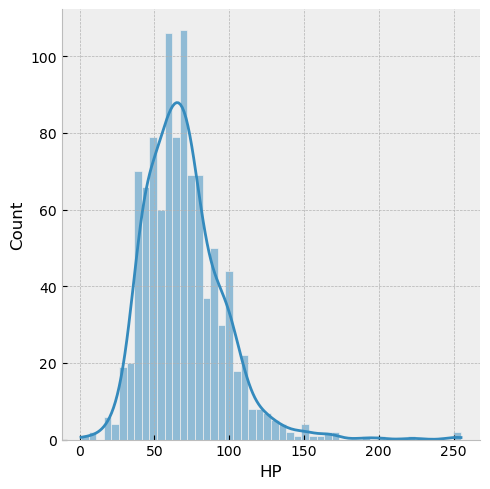

In [12]:
sns.displot(df['HP'], kde = True, bins = 50)

In [13]:
#This creates dataframes based on steel, fighting, and bug typings
steel = df[(df['Type 1'] == 'Steel') | (df['Type 2'] == 'Steel')]
fighting = df[(df['Type 1'] == 'Fighting') | (df['Type 2'] == 'Fighting')]
bug = df[(df['Type 1'] == 'Bug') | (df['Type 2'] == 'Bug')]

In [14]:
bug

,National Dex Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Stat Total,Weight,Height,Generation,Offensive Stats,Defensive Stats,BMI
9,10,Caterpie,Bug,Bug,45,30,35,20,20,45,195,2.9,0.3,1,95,100,32.222222
10,11,Metapod,Bug,Bug,50,20,55,25,25,30,205,9.9,0.7,1,75,130,20.204082
11,12,Butterfree,Bug,Flying,60,45,50,80,80,70,385,32.0,1.1,1,195,190,26.446281
12,13,Weedle,Bug,Poison,40,35,30,20,20,50,195,3.2,0.3,1,105,90,35.555556
13,14,Kakuna,Bug,Poison,45,25,50,25,25,35,205,10.0,0.6,1,85,120,27.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,919,Nymble,Bug,Bug,33,46,40,21,25,45,210,1.0,0.2,9,112,98,25.000000
919,920,Lokix,Bug,Dark,71,102,78,52,55,92,450,17.5,1.0,9,246,204,17.500000
952,953,Rellor,Bug,Bug,41,50,60,31,58,30,270,1.0,0.2,9,111,159,25.000000
953,954,Rabsca,Bug,Psychic,75,50,85,115,100,45,470,3.5,0.3,9,210,260,38.888889


In [15]:
#I ended up not using this, but this creates a data frame using steel and bug
#types combined
steel_bug = pd.concat([steel, bug])

In [16]:
#Unfortunately, there are pokemon that are both bug AND Steel type, such as Scizor
#So this removes any duplicate rows from the dataframe
steel_bug.drop_duplicates(subset = ['Name'])

,National Dex Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Stat Total,Weight,Height,Generation,Offensive Stats,Defensive Stats,BMI
80,81,Magnemite,Electric,Steel,25,35,70,95,55,45,325,6.0,0.3,1,175,150,66.666667
81,82,Magneton,Electric,Steel,50,60,95,120,70,70,465,60.0,1.0,1,250,215,60.000000
204,205,Forretress,Bug,Steel,75,90,140,60,60,40,465,125.8,1.2,2,190,275,87.361111
207,208,Steelix,Steel,Ground,75,85,200,55,65,30,510,400.0,9.2,2,170,340,4.725898
211,212,Scizor,Bug,Steel,70,130,100,55,80,65,500,118.0,1.8,2,250,250,36.419753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,919,Nymble,Bug,Bug,33,46,40,21,25,45,210,1.0,0.2,9,112,98,25.000000
919,920,Lokix,Bug,Dark,71,102,78,52,55,92,450,17.5,1.0,9,246,204,17.500000
952,953,Rellor,Bug,Bug,41,50,60,31,58,30,270,1.0,0.2,9,111,159,25.000000
953,954,Rabsca,Bug,Psychic,75,50,85,115,100,45,470,3.5,0.3,9,210,260,38.888889


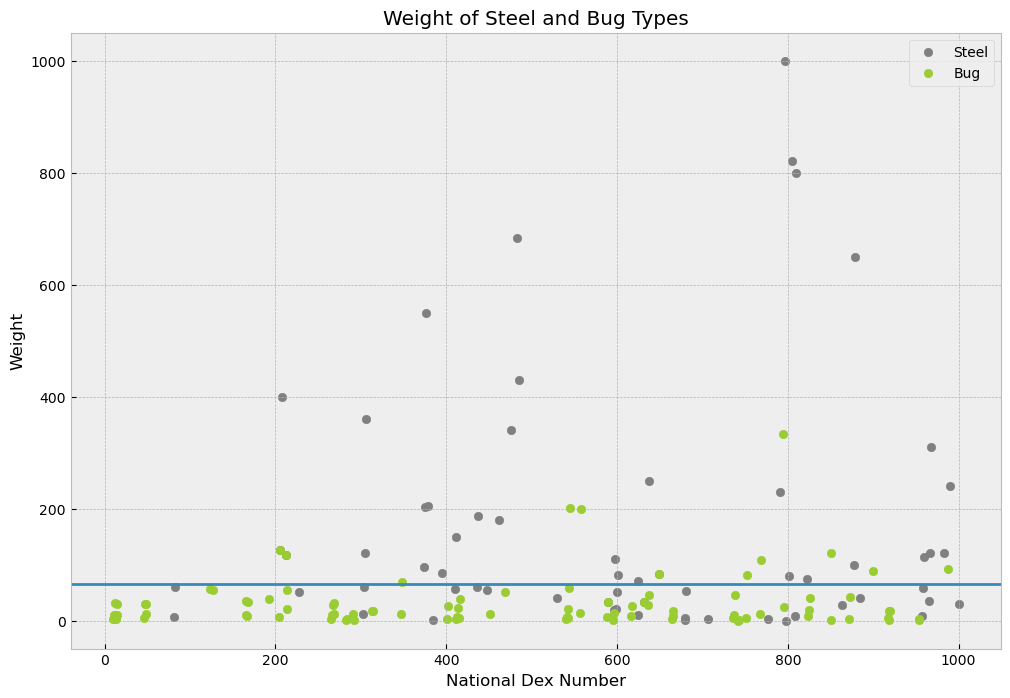

In [17]:
#This creates a graph showing that on average, steel types weigh more than bug types
#I also added a line showing the mean weight of all pokemon. As we can see, steel types
#are usually heavier than average, and bug types less than average
fig = plt.figure(figsize = (12,8))
plt.scatter(steel['National Dex Number'], steel['Weight'],  color = 'gray', label = 'Steel')
plt.scatter(bug['National Dex Number'], bug['Weight'], color = 'yellowgreen', label = 'Bug')
plt.xlabel('National Dex Number')
plt.ylabel('Weight')
plt.title('Weight of Steel and Bug Types')
plt.axhline(df['Weight'].mean())
plt.legend()
plt.show()

Text(0, 0.5, 'BMI')

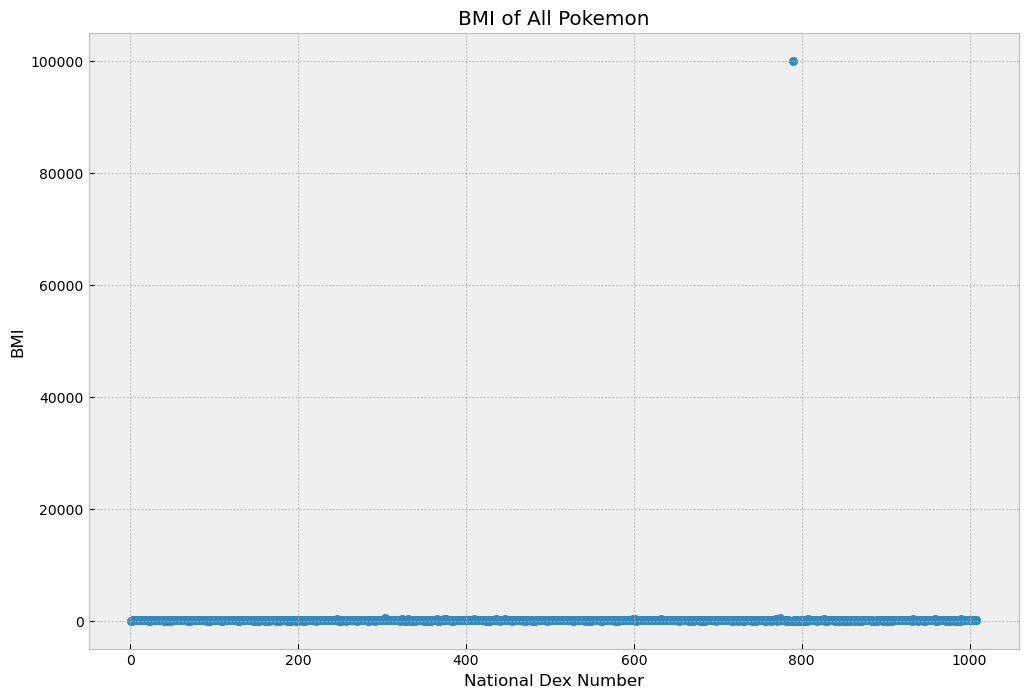

In [18]:
#This graph was supposed to show the BMI of all Pokemon, but it also revealed
#one extreme outlier
fig = plt.figure(figsize = (12,8))
plt.scatter(df['National Dex Number'], df['BMI'])
plt.title('BMI of All Pokemon')
plt.xlabel('National Dex Number')
plt.ylabel('BMI')

In [19]:
df.iloc[df['BMI'].idxmax()]

National Dex Number        790
Name                   Cosmoem
Type 1                 Psychic
Type 2                 Psychic
HP                          43
Attack                      29
Defense                    131
Sp. Attack                  29
Sp. Defense                131
Speed                       37
Stat Total                 400
Weight                   999.9
Height                     0.1
Generation                   7
Offensive Stats             95
Defensive Stats            305
BMI                    99990.0
Name: 789, dtype: object

In [20]:
#This creates a dataframe without the outlier, Cosmoem, and checks to see what the
#new highest BMi is
no_cosmoem = df.drop([0, 789])
no_cosmoem.iloc[df['BMI'].idxmax()]

National Dex Number        792
Name                    Lunala
Type 1                 Psychic
Type 2                   Ghost
HP                         137
Attack                     113
Defense                     89
Sp. Attack                 137
Sp. Defense                107
Speed                       97
Stat Total                 680
Weight                   120.0
Height                     4.0
Generation                   7
Offensive Stats            347
Defensive Stats            333
BMI                        7.5
Name: 791, dtype: object

Text(0, 0.5, 'BMI')

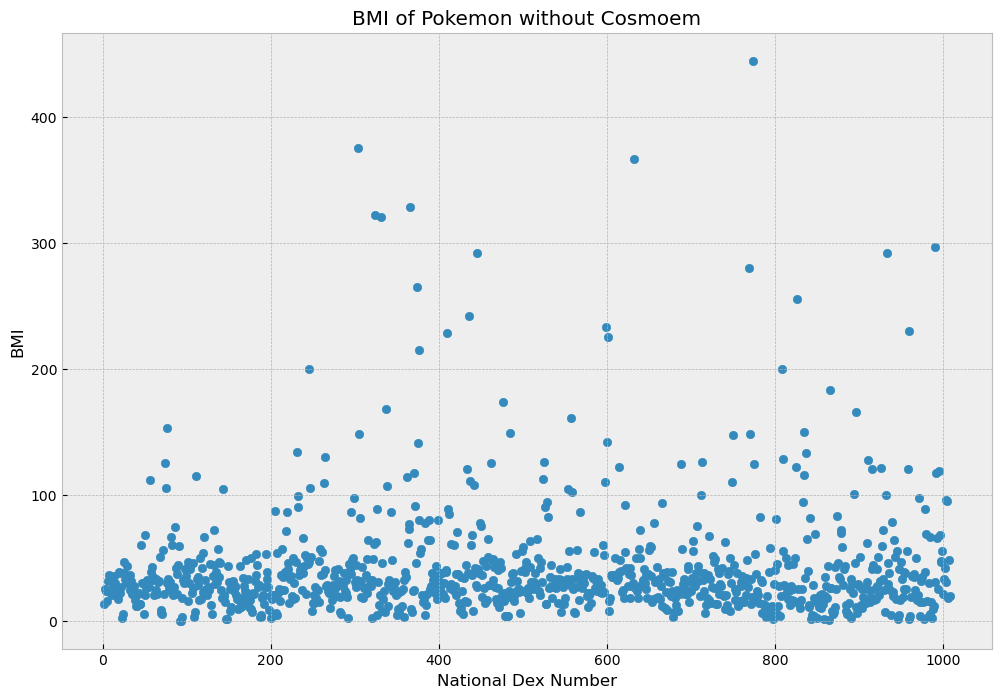

In [21]:
#Here's a scatterplot of the BMI of all pokemon without Cosmoem
fig = plt.figure(figsize = (12,8))
plt.scatter(no_cosmoem['National Dex Number'], no_cosmoem['BMI'])
plt.title('BMI of Pokemon without Cosmoem')
plt.xlabel('National Dex Number')
plt.ylabel('BMI')

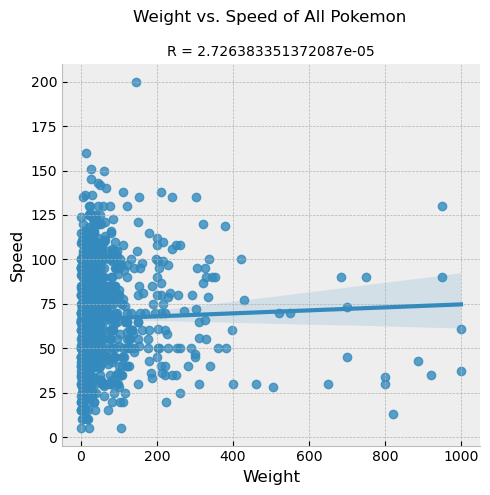

In [22]:
#I was curious to see if lighter or faster pokemon have higher speed stats
#I manually calculated out the R value and posted it in the title
#Looking at the graph and R values, there is no correlation betweent the weight of a pokemon or its speed
sns.lmplot(x = 'Weight', y = 'Speed', data = df)
plt.title('R = 2.726383351372087e-05', fontdict = {'fontsize': 10 })
plt.suptitle('Weight vs. Speed of All Pokemon', x = .55)
#x = .55 is used to better center the X axis of the sup title
plt.tight_layout()

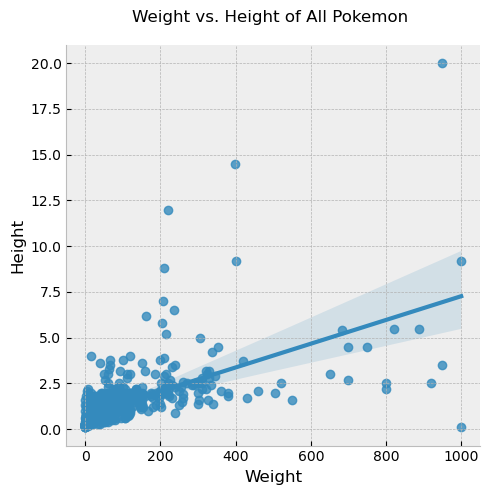

In [23]:
#However, if we look at weight vs. height, we see a definite correlation between taller pokemon being heavier as well
sns.lmplot(x = 'Weight', y = 'Height', data = df)
plt.suptitle('Weight vs. Height of All Pokemon', x = .55)
#x = .55 is used to better center the X axis of the sup title
plt.tight_layout()

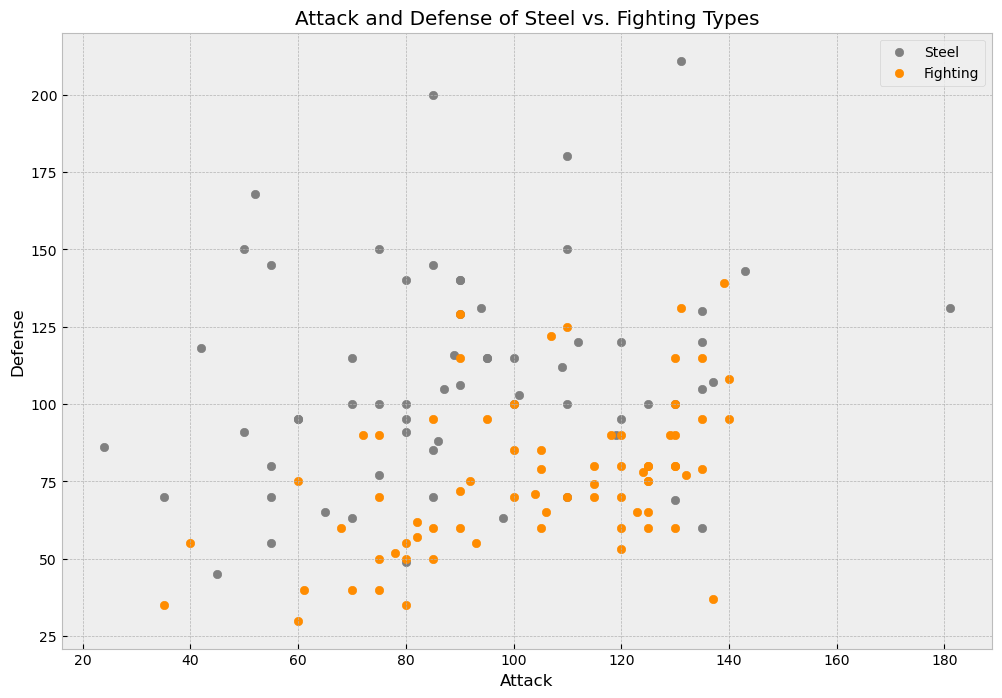

In [24]:
#This graph shows the distribution of attack and defense stats of steel and fighting types
#As we can see, fighting types tend to have more attack stats, and steel has more defense
fig = plt.figure(figsize = (12,8))
plt.scatter(steel['Attack'], steel['Defense'],  color = 'gray', label = 'Steel')
plt.scatter(fighting['Attack'], fighting['Defense'], color = 'darkorange', label = 'Fighting')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Attack and Defense of Steel vs. Fighting Types')
plt.legend()
plt.show()

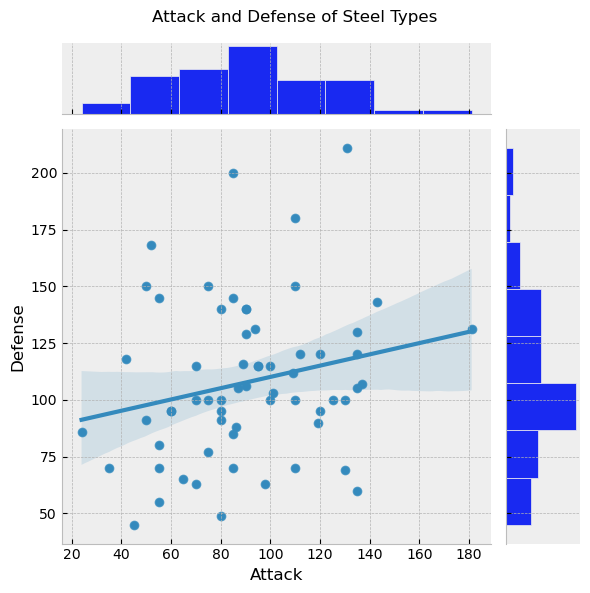

In [25]:
#joint plot sets up this dual plot. We use .plot and the first input is the 
#type of plot for the main graph, and second is for the outer ones. We then use
#.fig.suptitle to add in a title
sns.jointplot(data = steel, x = 'Attack', y = 'Defense').plot(sns.regplot, sns.histplot).fig.suptitle('Attack and Defense of Steel Types') 
plt.tight_layout()

In [26]:
gen = df.groupby('Generation').mean()

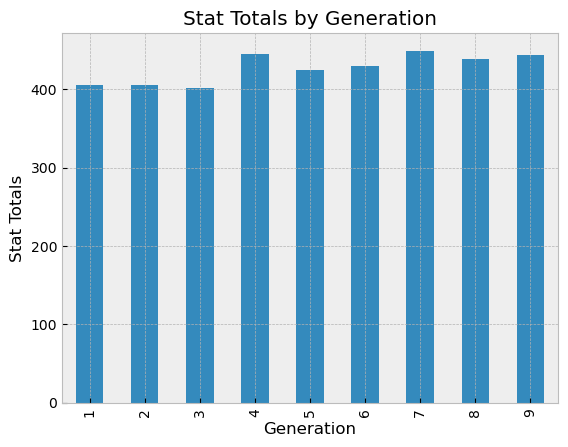

In [32]:
#We can see here that there is some small amount of power creep across the generations
gen['Stat Total'].plot.bar()
plt.title('Stat Totals by Generation')
plt.ylabel('Stat Totals')
plt.show()

In [29]:
#this creates a special data frame that only contains battle stat information
df_stats = df.drop(['National Dex Number', 'Stat Total', 'Weight', 'Height', 'Generation', 'BMI', 'Offensive Stats', 'Defensive Stats'], axis = 1)

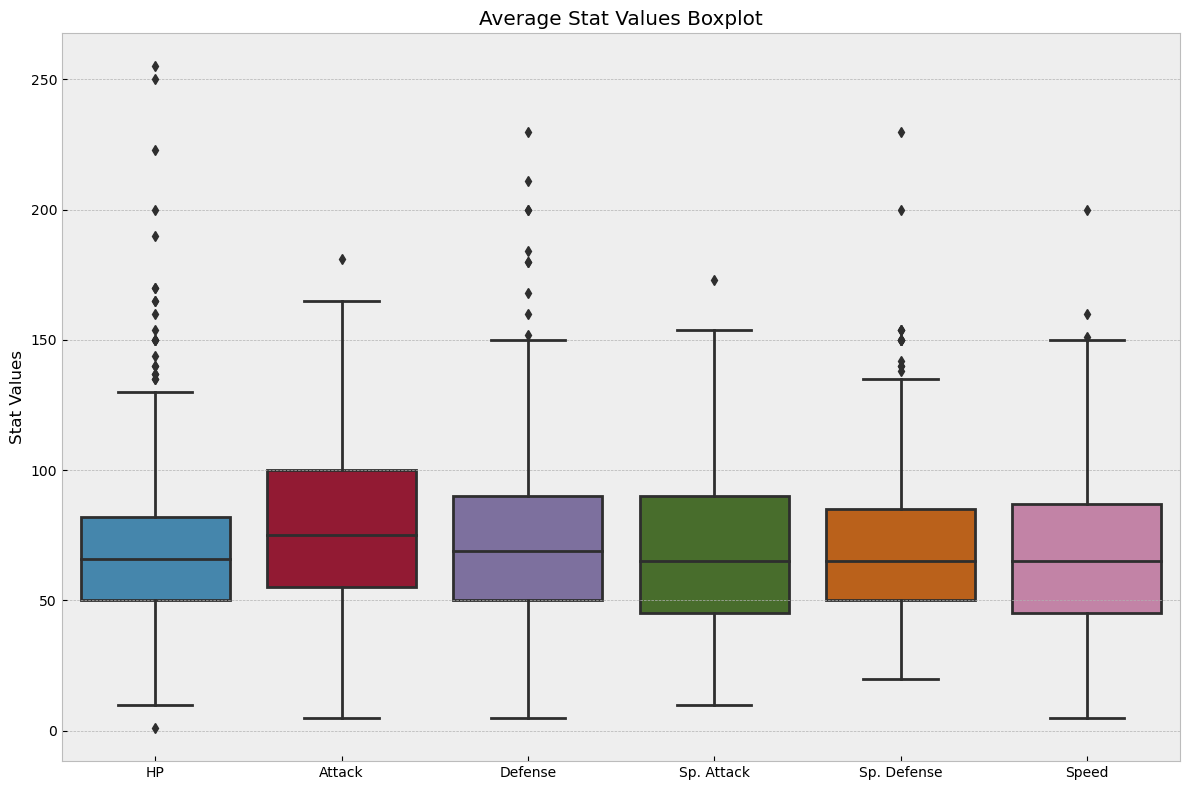

In [34]:
#This is a boxplot of the battle stat data
fig = plt.figure(figsize = (12,8))
sns.boxplot(data = df_stats)
plt.ylabel('Stat Values')
plt.title('Average Stat Values Boxplot')
plt.tight_layout()

In [35]:
#this sorts the df dataframe by type 1 and then takes the mean value of each column
type1_attack = df.groupby(by = ['Type 1']).median()

In [36]:
#this sorts the mean attack values from lowest to highest, and then creates
#a list using their indexes as shown below.
type1_attack_index = type1_attack['Attack'].sort_values().index

In [37]:
type1_attack_index

Index(['Psychic', 'Fairy', 'Bug', 'Ghost', 'Grass', 'Ice', 'Water', 'Electric',
       'Poison', 'Normal', 'Fire', 'Rock', 'Flying', 'Steel', 'Ground', 'Dark',
       'Dragon', 'Fighting'],
      dtype='object', name='Type 1')

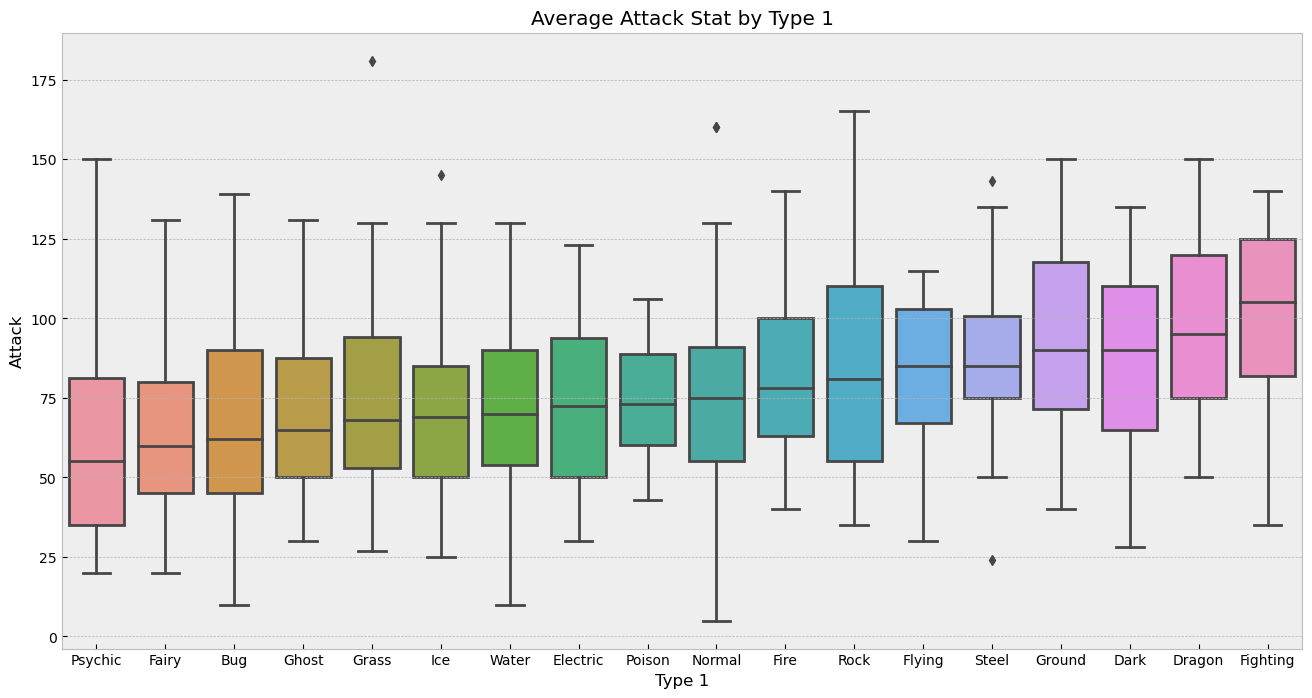

In [38]:
#the order parameter determines the order to plat categories in
#Normally, this graph would be in a different order, but we decided to order it
#by average attack stat
fig = plt.figure(figsize = (16,8))
sns.boxplot(x = 'Type 1', y = 'Attack', data = df, order = type1_attack_index)
plt.title('Average Attack Stat by Type 1')
plt.show()

In [39]:
type1_spattack = df.groupby(by = ['Type 1']).median()
type1_spattack_index = type1_spattack['Sp. Attack'].sort_values().index

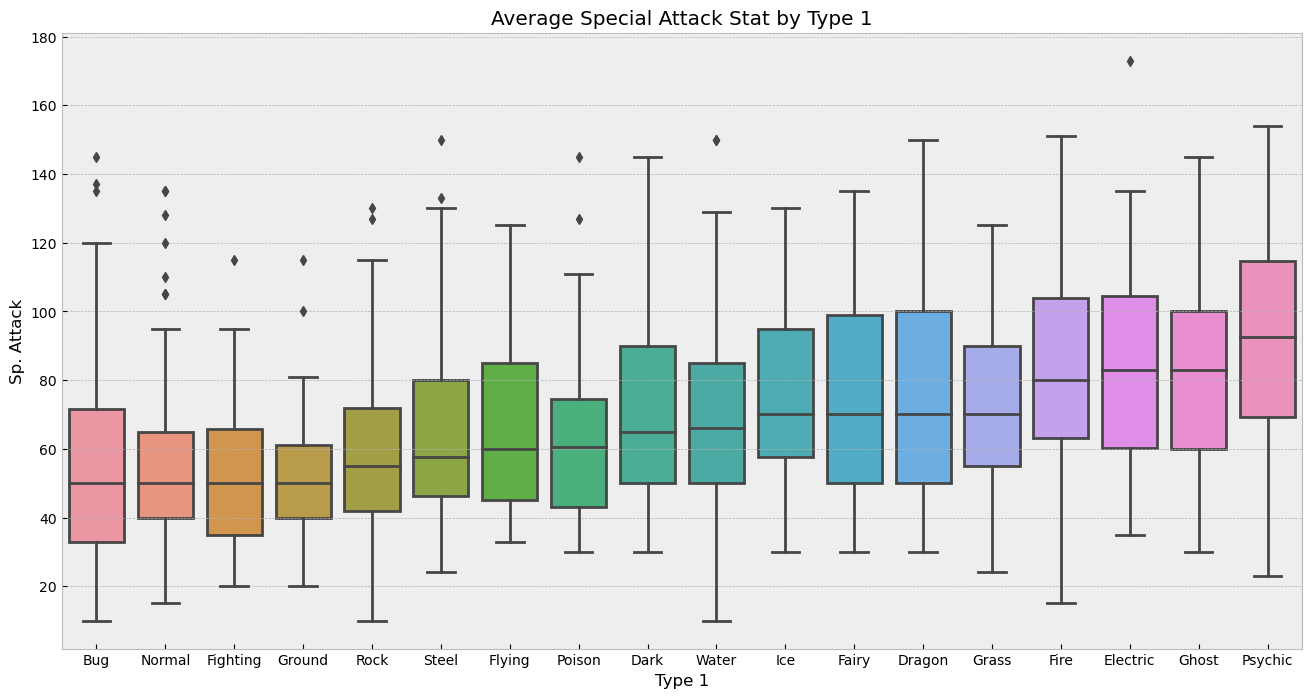

In [40]:
fig = plt.figure(figsize = (16, 8))
sns.boxplot(x = 'Type 1', y = 'Sp. Attack', data = df, order = type1_spattack_index)
plt.title('Average Special Attack Stat by Type 1')
plt.show()

In [41]:
type1_defensive_stats = df.groupby(by = ['Type 1']).median()
type1_defensive_stats_index = type1_defensive_stats['Defensive Stats'].sort_values().index

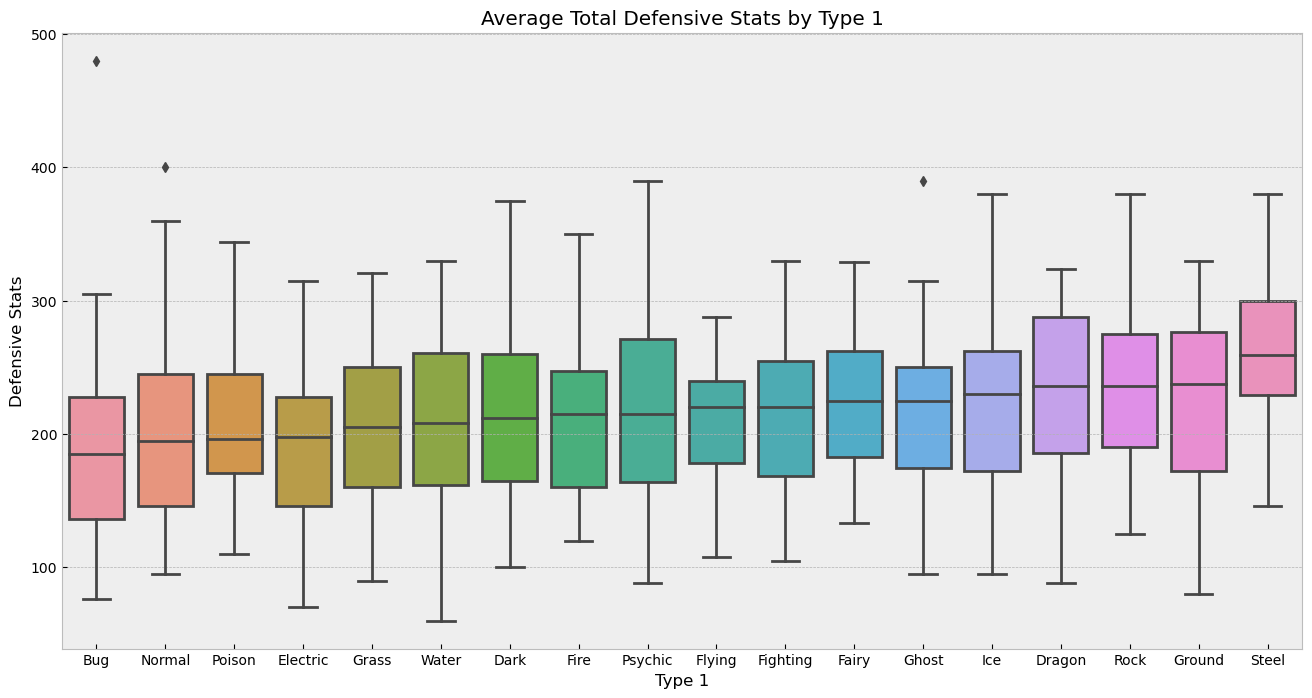

In [42]:
fig = plt.figure(figsize = (16, 8))
sns.boxplot(x = 'Type 1', y = 'Defensive Stats', data = df, order = type1_defensive_stats_index)
plt.title('Average Total Defensive Stats by Type 1')
plt.show()

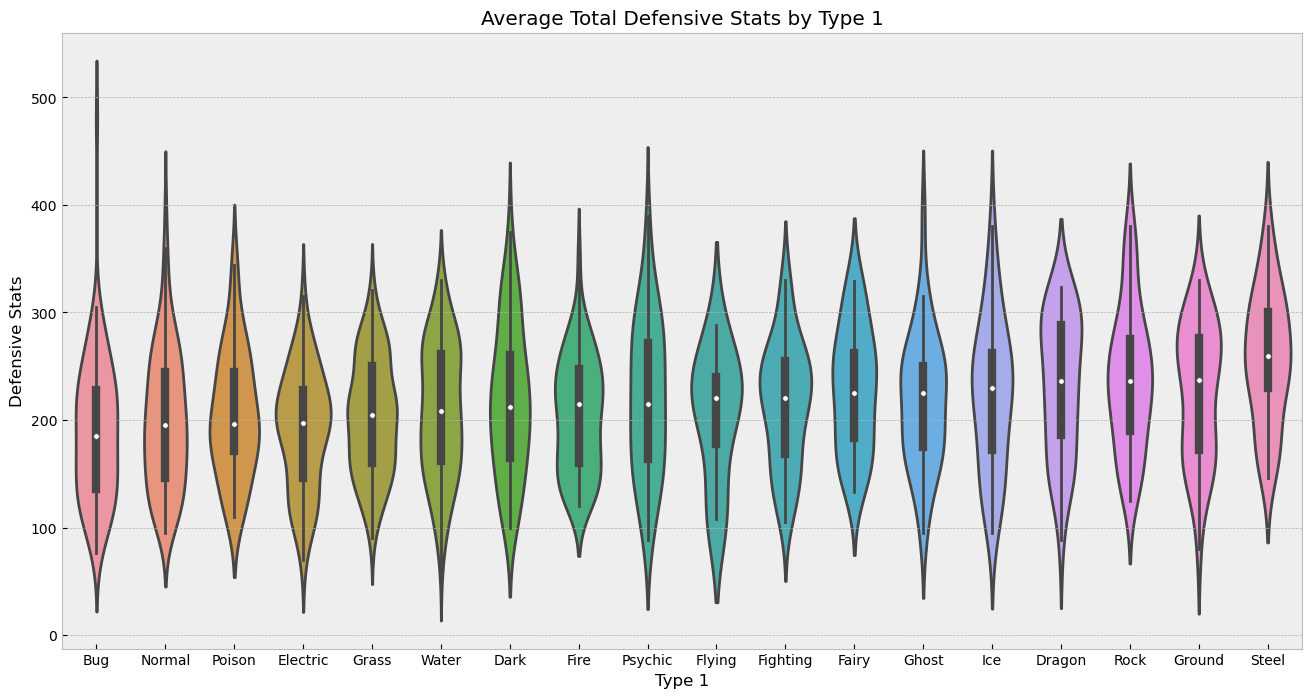

In [43]:
#A violinplot is similar to a boxplot, but the wider parts of the violin show density
#The wider a spot is, the more figures are in that area
fig = plt.figure(figsize = (16, 8))
sns.violinplot(x = 'Type 1', y = 'Defensive Stats', data = df, order = type1_defensive_stats_index)
plt.title('Average Total Defensive Stats by Type 1')
plt.show()

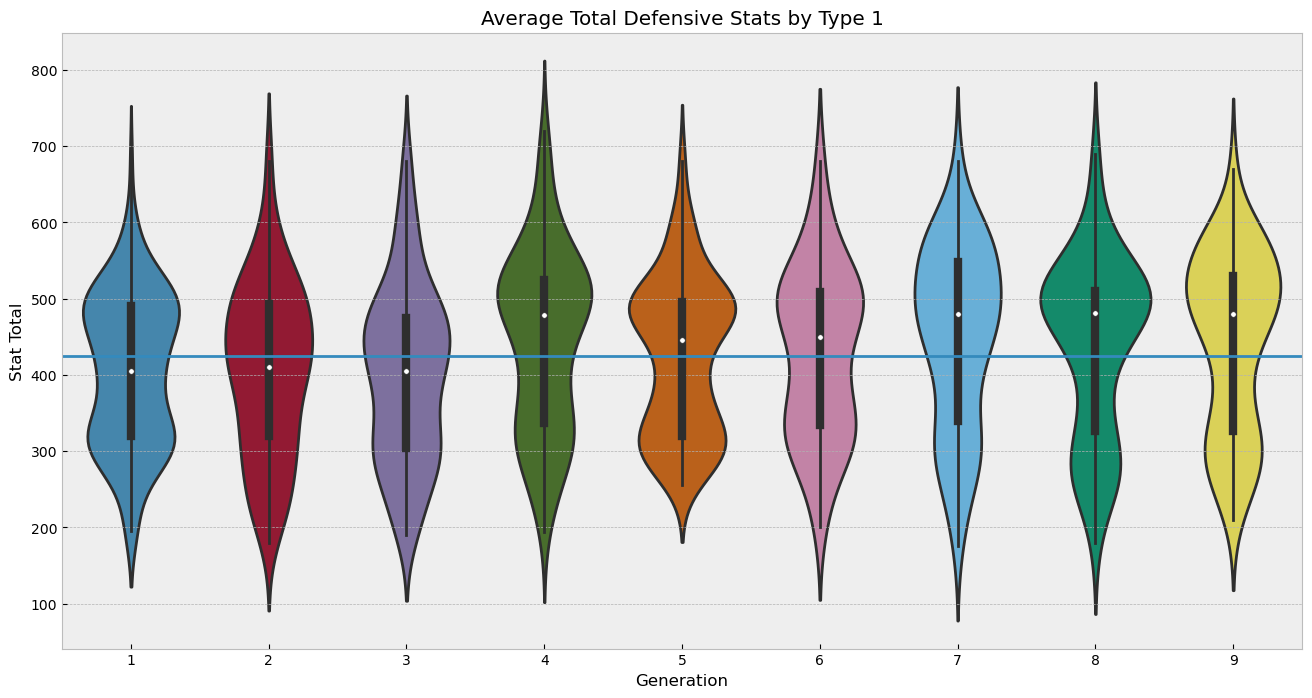

In [44]:
fig = plt.figure(figsize = (16, 8))
sns.violinplot(x = 'Generation', y = 'Stat Total', data = df)
plt.title('Average Total Defensive Stats by Type 1')
plt.axhline(df['Stat Total'].mean())
plt.show()

#axhline plots a line from the y axis across
#axvline plots a line from the x axis up

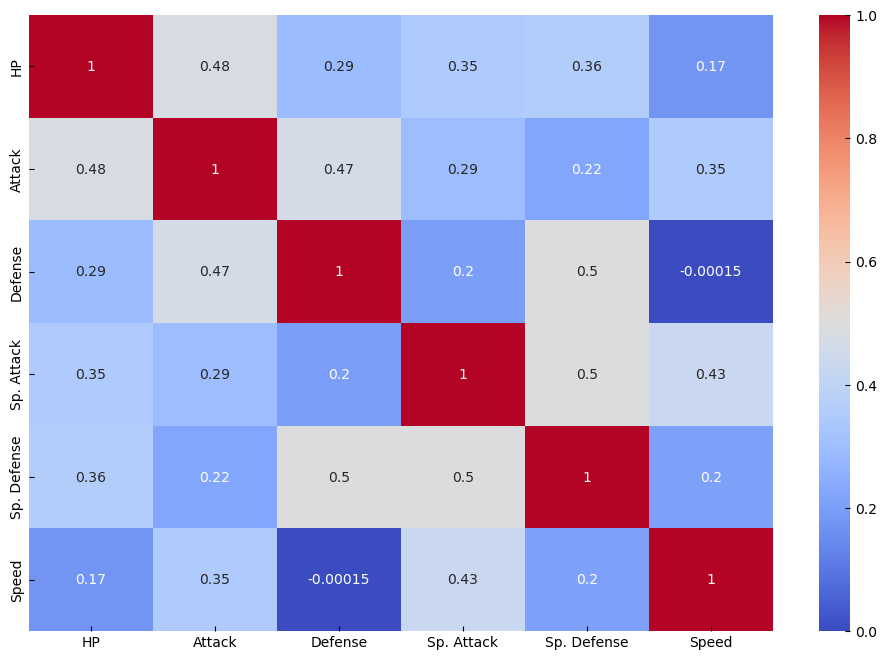

In [46]:
#Lastly, we have a heatmap to show any possible correlations between stats
#Unfortunately it doesn't look like Pokemon battle stat data is correlated
plt.figure(figsize = (12,8))
sns.heatmap(df_stats.corr(), annot = True, cmap = 'coolwarm')
plt.show()